<a href="https://colab.research.google.com/github/xpdlaldam/nlp/blob/master/Hugging%20Face/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. pipeline**

In [ ]:
!pip install datasets gradio evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found 

# Libraries

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

# 1-1. sentiment analysis

In [ ]:
### sentiment-analysis
classifier = pipeline("sentiment-analysis")

sents = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "neutral i'd say"
    ]
# classifier(sents[2]) # one by one
classifier(sents) # simultaneous

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'NEGATIVE', 'score': 0.9988003969192505}]

## 1-2. customize labels

In [ ]:
### zero-shot-classification: lets customize labels
classifier = pipeline("zero-shot-classification")
sents = [
    "this is biology 101",
    "president trump",
    "capex was over 1B this time",
]

classifier(
    sents,
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'sequence': 'this is biology 101',
  'labels': ['education', 'business', 'politics'],
  'scores': [0.9758106470108032, 0.015421471558511257, 0.008767769671976566]},
 {'sequence': 'president trump',
  'labels': ['politics', 'business', 'education'],
  'scores': [0.8464727401733398, 0.11240741610527039, 0.04111983999609947]},
 {'sequence': 'capex was over 1B this time',
  'labels': ['business', 'politics', 'education'],
  'scores': [0.9776291847229004, 0.013183980248868465, 0.009186833165585995]}]

## 1-3. generate text

In [ ]:
# distilgpt2
# deepset/roberta-base-squad2
generator = pipeline("text-generation", model="distilgpt2")
generator("summarize AMD's most recent financial report")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'summarize AMD\'s most recent financial report, which includes market estimates and market analyses, released today (April 12, 2013). According to the report\'s conclusions, AMD is currently in the midst of a "reorganization" of financial markets because'}]

In [ ]:
pipe = pipeline(model="FacebookAI/roberta-large-mnli")

sents = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "neutral i'd say"
    ]

pipe(sents)

Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'label': 'NEUTRAL', 'score': 0.737484872341156},
 {'label': 'NEUTRAL', 'score': 0.5799961686134338},
 {'label': 'ENTAILMENT', 'score': 0.6553459167480469}]

## 1-4. speech recognition

In [ ]:
pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h", device=0)
dataset = load_dataset("superb", name="asr", split="test")

# KeyDataset (only *pt*) will simply return the item in the dict returned by the dataset item
# as we're not interested in the *target* part of the dataset. For sentence pair use KeyPairDataset
for out in tqdm(pipe(KeyDataset(dataset, "file"))):
    print(out)
    # {"text": "NUMBER TEN FRESH NELLY IS WAITING ON YOU GOOD NIGHT HUSBAND"}
    # {"text": ....}
    # ....

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cpu


README.md:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

superb.py:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

The repository for superb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/superb.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2703 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2620 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
    num_rows: 2620
})

In [ ]:
from huggingface_hub import list_datasets
print([dataset.id for dataset in list_datasets()])

In [ ]:
minds = load_dataset("PolyAI/minds14", name="ko-KR", split="train")
minds

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

minds14.py:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 592
})

In [ ]:
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/ko-KR~ATM_LIMIT/602bef265f67b421554f65e7.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/ko-KR~ATM_LIMIT/602bef265f67b421554f65e7.wav',
  'array': array([0.00024414, 0.        , 0.        , ..., 0.00073242, 0.00048828,
         0.00048828]),
  'sampling_rate': 8000},
 'transcription': 'app Manager 하고 싶은데 최대 금액이 얼마인지요',
 'english_transcription': 'I want to do app manager, what is the maximum amount',
 'intent_class': 3,
 'lang_id': 8}

In [ ]:
id2label = minds.features["intent_class"].int2str
id2label(minds[0]["intent_class"])

'atm_limit'

In [ ]:
minds.shuffle()[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/ko-KR~DIRECT_DEBIT/603f0615d7d083c1cb57a8d1.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/ko-KR~DIRECT_DEBIT/603f0615d7d083c1cb57a8d1.wav',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 8000},
 'transcription': '자동 이체를 어떻게 사용해요',
 'english_transcription': 'How to use automatic debit',
 'intent_class': 8,
 'lang_id': 8}

In [ ]:
import gradio as gr

def generate_audio():
    example = minds[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"], # Hz
        audio["array"], # contains the sound represented in numbers in an array
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(1):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/processing_utils.py:741: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://78f42f61172fb19a87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://78f42f61172fb19a87.gradio.live


In [ ]:
example = minds[0]
example['audio']

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/ko-KR~ATM_LIMIT/602bef265f67b421554f65e7.wav',
 'array': array([0.00024414, 0.        , 0.        , ..., 0.00073242, 0.00048828,
        0.00048828]),
 'sampling_rate': 8000}

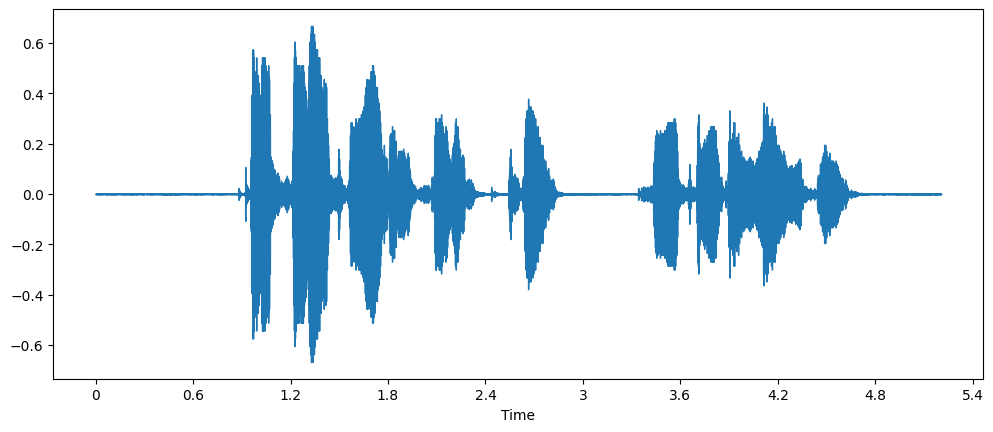

In [ ]:
## visualize
import librosa
import matplotlib.pyplot as plt
import librosa.display

example = minds[0]

plt.figure().set_figwidth(12)
librosa.display.waveshow(example["audio"]["array"], sr=example["audio"]["sampling_rate"])

# 1-5. Fill in the blank

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("The cheapest flight from EWR to ICN is <mask>.", top_k=5)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.01649114117026329,
  'token': 2144,
  'token_str': ' Rs',
  'sequence': 'The cheapest flight from EWR to ICN is Rs.'},
 {'score': 0.013050469569861889,
  'token': 37242,
  'token_str': ' TBD',
  'sequence': 'The cheapest flight from EWR to ICN is TBD.'},
 {'score': 0.01169054675847292,
  'token': 577,
  'token_str': ' available',
  'sequence': 'The cheapest flight from EWR to ICN is available.'},
 {'score': 0.011038240045309067,
  'token': 6798,
  'token_str': ' Dubai',
  'sequence': 'The cheapest flight from EWR to ICN is Dubai.'},
 {'score': 0.01040987204760313,
  'token': 199,
  'token_str': ' 2018',
  'sequence': 'The cheapest flight from EWR to ICN is 2018.'}]

In [ ]:
ner = pipeline("ner", grouped_entities=True)
ner("Elon Musk and Trump are on the same boat")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9942266,
  'word': 'Elon Musk',
  'start': 0,
  'end': 9},
 {'entity_group': 'PER',
  'score': 0.9994424,
  'word': 'Trump',
  'start': 14,
  'end': 19}]

In [ ]:
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-ko-en")
pipe("설악산은 한국의 100대 명산 중 하나이다")

Device set to use cpu


[{'translation_text': 'He said, "No, no, no.'}]

# 2. The Transformer architecture

In [ ]:
# The Transformer model is based on Attention is All you Need
# Attention is All you Need is a encoder-decoder (aka sequence to sequence transformer) model where it has encoders and decoders
# The encoder "encodes" text into numerical representations
# These numerical representations are all also called "embeddings" or "features"
# The decoder "decodes" the representations from the encoder

## 2-1. Encoder models

In [ ]:
# ex) Welcome to Korea => each word has its own numerical representation (aka feature vector or tensor vector) comprising of sequence of numbers
# ex) "Welcome" corresponds to [.1, .3, .2, ...]

# ex) BERT

# The feature vector looks at the left and right of the word, hence capturing "context" of the sentence thanks to the self-attention mechanism

# Encoder models are good at obtaining an understanding of sequences and the relationship b/w words
  # Extracting meaningful information
  # Masked Language Modeling: guessing a randomly masked work
  # Classification => Sentiment analysis ex) is the sentence positive or negative

# 2-2. Decoders

In [ ]:
### great at:
## uni-directional: access to either the left or right context

## causal tasks: guesses the next word in a sequence (auto-regressive)
# ex) my => name
# my name => is
# my name is => Peter

## generating sequences

# words can only see the words on their left side; the right side is hidden
# => means unidirectional

# 2-3. Encoder-Decoder

In [ ]:
## aka sequence-to-sequence model
# step 1) the encoder takes a sequence of words such as "Welcome to Korea"
# step 2) the encoder outputs a numerical represenation for each word
# step 3) the decoder takes the first word Welcome as an input
# step 4) the decoder outputs the second word based on the first word (at this point we don't need to use the encoder)

##
# the encoder takes cafe of understanding the sequence
# the decoder takes care of generating a sequence according to the understanding of the encoder, hence it "decodes"
# the weights are not necessarily shared b/w an encoder and a decoder

## good at:
# summarizing text

# 3. How does the pipeline function work?

In [ ]:
## there are 3 stages
## 1. Tokenizer
# converts raw text into input ids
# ex) hi my name is => [101, 2342, 1212, 2357]
# the AutoTokenizer class can load the tokenizer for any checkpoint (language model)
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "i'm pretty hungry right now",
    "i need food now",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
inputs

# padding=True: to make the sentences the same lenth
# truncation=True: ensure any sentence does not exceed the maximum the model can handle
# return_tensors="pt": pt means pytorch tensor
# attention_mask: indicates where padding was applied so the model does not pay attention to it
# outputs a dictionary with two keys
# input_ids: one row per sentence => unique identifiers of the tokens for each sentence

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 1045, 1005, 1049, 3492, 7501, 2157, 2085,  102],
        [ 101, 1045, 2342, 2833, 2085,  102,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0]])}

In [ ]:
## 2. Model
# Based on the input ids from the tokenizer, we now move on to the Model
# part which outputs logits
# outputs "hidden states" aka features
# "hidden states" are usually inputs to another part of the model, known as the "head"
# for each model input (sentence in this case), we get a high-dimensional vector that represents
# the contextual understanding of that input comprising of
# batch size:  number of sequences (sentences in this case)
# sequence length
# hidden size: the vector dimension of each model input
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

outputs = model(**inputs)

# [2, 9, 768]
# 2: number of sequences
# 9: sequence length
# 768: vector dimension of each model input
outputs.last_hidden_state.shape

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

torch.Size([2, 9, 768])

In [ ]:
## 3. Postprocessing
# For our example, we need a model with a sequence classification head
#
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

# you can see that the dimensionality is much lower as the model head
# took the high-dimensional input and outputted a 2 by 2 vector
# (one per label => positive and negative for each sequence)
print(outputs.logits.shape)

# note that these numbers are logits (the raw, unnormalized scores)
# , not probabilities
# they need to go through a SoftMax layer to convert to probabilities
# Q. why does all Transformers models outputs logits?
# A. because the loss function for training will generally fuse
# the last activation function such as a SoftMax, with the actual loss
# such as cross entropy
print(outputs.logits)
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

torch.Size([2, 2])
tensor([[ 1.2353, -1.0638],
        [ 2.3164, -2.0826]], grad_fn=<AddmmBackward0>)
tensor([[0.9088, 0.0912],
        [0.9879, 0.0121]], grad_fn=<SoftmaxBackward0>)


In [ ]:
# model labels
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

# How To Instantiate a Transformers model

##

In [ ]:
### How to upload weights
## Method 1
from transformers import AutoConfig
AutoConfig.from_pretrained("bert-base-cased")

## Method 2
from transformers import BertConfig, BertModel
model = BertModel.from_pretrained("bert-base-cased")

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
## Config file: a blueprint that contains all the info to create the model architecture
BertConfig.from_pretrained("bert-base-cased")

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [ ]:
## to use different layers ex) use 10 layers instead of 12
# however, this will start with randomly assigned weights
BertConfig.from_pretrained("bert-base-cased", num_hidden_layers=10)
BertModel(BertConfig)

# 5. Tokenizers

## 5-1. Tokenizers convert raw text to numbers called "encoding"

In [ ]:
from transformer import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

seq1 = "what's it like living in Ireland"

print(tokenizer(seq1)) # this is actually two steps as shown in the following:

tokens = tokenizer.tokenize(seq1) # step 1. to see the tokenized seq
print(tokens)

print(tokenizer.convert_tokens_to_ids(tokens)) # step 2. convert to input IDs

In [ ]:
seq2 = "how's it like living in Korea"

tokens = tokenizer.tokenize(seq1)
print(tokens)

print(tokenizer.convert_tokens_to_ids(tokens))

In [ ]:
## Decoding is the opposite of encoding: converts vocabulary indices (input IDs) to raw text (tokens)
# This behavior will be very useful for models that predict new text (e.g., text generation from a promt, seq-to-seq problems like translation or summarization)
tokenizer.decode([1293, 112, 188, 1122, 1176, 1690, 1107, 3577])

# 6. Handling Multiple Sequences

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## 1. Choose tokenizer model
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

## 2. Define Tokenizer based on defined checkpoint in 1.
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

## 3. Define sentiment analysis model => will be task-specific
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

## 4. Make seq test case
seq = "I've never been to Ireland. I'ld like to go someday"

## 5. Apply tokenizer defined in 2.

## 6. Convert tokens to numbers (input IDs)

## 7.
input_ids = torch.tensor([ids])
print(input_ids)

## Logit
outputs = model(input_ids)

## Convert logit to probability using softmax
preds = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(preds)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## 1. Choose tokenizer model
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

## 2. Define Tokenizer based on defined checkpoint in 1.
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

## 3. Define sentiment analysis model => will be task-specific
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

## 4. Make seq test case
seqs = ["I've been waiting very long to finally meet you", "I missed you so much"]

## 5. Apply tokenizer defined in 2.
tokens = tokenizer(seqs, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)
print(output)

preds = torch.nn.functional.softmax(output.logits, dim=-1)
print(preds)

# 7. Preprocessing

In [13]:
## goal: from a pair of sentences, the model can tell if they are a paraphrase
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [14]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [15]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}